###### <div style="text-align: right"> Kamil Pluciński 132307 I5 Wtorek 15.10 

# <div style="text-align: center">Sprawozdanie</div> 

Rozpoczynam od zaimportowania danych. Zdecydowałem się na zestaw zawierający zestawienie obserwacji na temat bezrobocia panującego w USA za panowanie danego prezydenta. Dane pochodzą z zestawu "100 Data Sets" znajdującego się na stronie:
https://www.openintro.org/stat/extras.php

In [2]:
unemployPres <- read.csv(file="unemployPres.txt", sep="	")
sprintf('Kolumny: %d',length(unemployPres))
sprintf('Wiersze: %d',length(unemployPres[,1]))
head(unemployPres)

[1] "Kolumny: 5"

[1] "Wiersze: 29"

year,potus,party,unemp,change
1899,William McKinley,Republican,11.62,-9.223301
1903,Theodore Roosevelt,Republican,4.30,-4.275907
1907,Theodore Roosevelt,Republican,3.29,-12.291499
1911,William Howard Taft,Republican,5.86,-26.590640
1915,Woodrow Wilson,Democratic,6.63,-20.962199
1919,Woodrow Wilson,Democratic,3.38,-10.280374


Dane składają się z 29 wierszy zawierających informacje o roku wyboru prezydenta, jego imieniu i nazwisku, partii, współczynniku bezrobocia i zmianie, które są zebrane w 5 kolumnach.

In [10]:
summary(unemployPres)

      year                            potus           party        unemp       
 Min.   :1899   Franklin Delano Roosevelt: 3   Democrate : 1   Min.   : 3.290  
 1st Qu.:1927   Bill Clinton             : 2   Democratic:12   1st Qu.: 4.600  
 Median :1955   Calvin Coolidge          : 2   Republican:16   Median : 5.600  
 Mean   :1955   Dwight David Eisenhower  : 2                   Mean   : 6.868  
 3rd Qu.:1983   George Walker Bush       : 2                   3rd Qu.: 6.930  
 Max.   :2011   Harry S. Truman          : 2                   Max.   :21.300  
                (Other)                  :16                                   
     change       
 Min.   :-26.591  
 1st Qu.:-20.962  
 Median :-12.291  
 Mean   :-12.421  
 3rd Qu.: -4.571  
 Max.   :  3.620  
                  

Z krótkiego podsumowania możemy odczytać, że zakres danych zawiera się miedzy 1899 a 2011 rokiem, najczęścej rządzącym prezydentem był Roosevelt, częściej wybieranym prezydentem był republikanin a bezrobocie w tych czasach wahało się między 3.29 a 21.3 gdzie średnia wynosiła 6.8 a mediana 5.6.

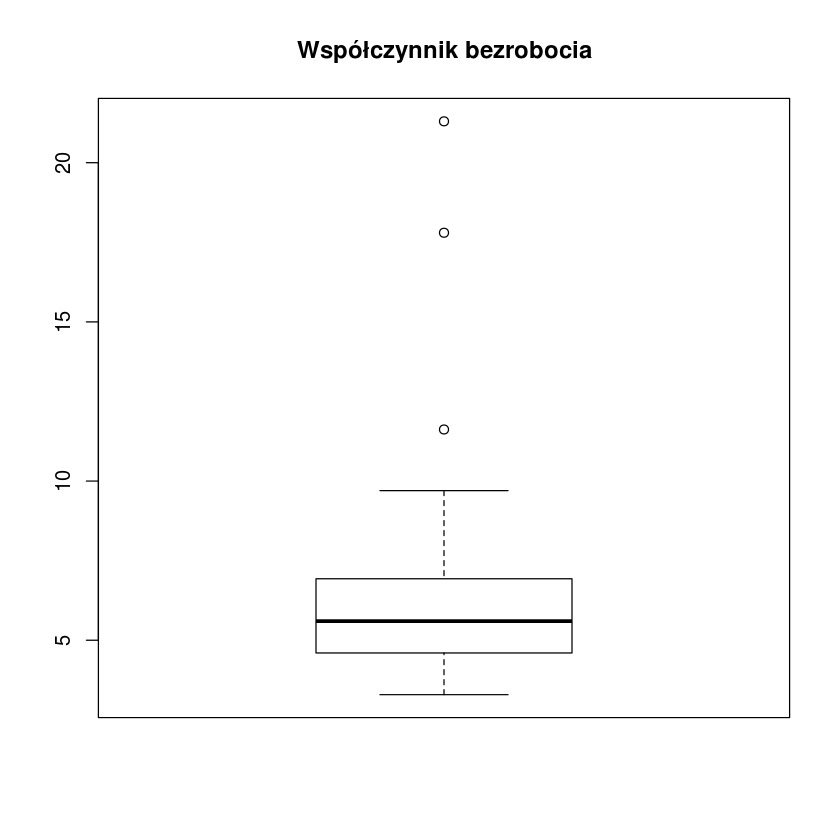

In [11]:
boxplot(unemployPres$unemp, data=nbaHeights, main="Współczynnik bezrobocia")

Jak widzimy dane mocno koncentrują się w okolicy 4-6 punktów procentowych z nielicznymi bardzo silnymi odchyleniami w stronę 20 punktów procentowych.

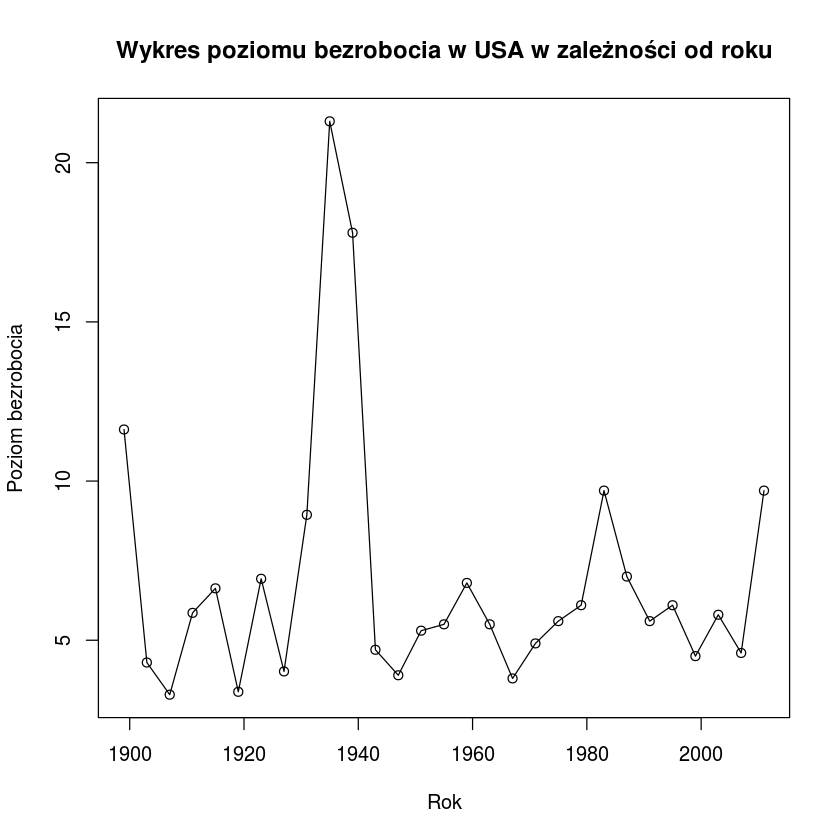

In [6]:
plot(unemployPres$unemp ~ unemployPres$year, type="o", xlab="Rok", ylab="Poziom bezrobocia", 
     main="Wykres poziomu bezrobocia w USA w zależności od roku")

Na podstawie tego wykresu możemy zauważyć, że największe "wystrzelenia" wykresu w górę przypadłu na rok ok.1940 co może wiązać się z wybuchem II Wojny Światowej.

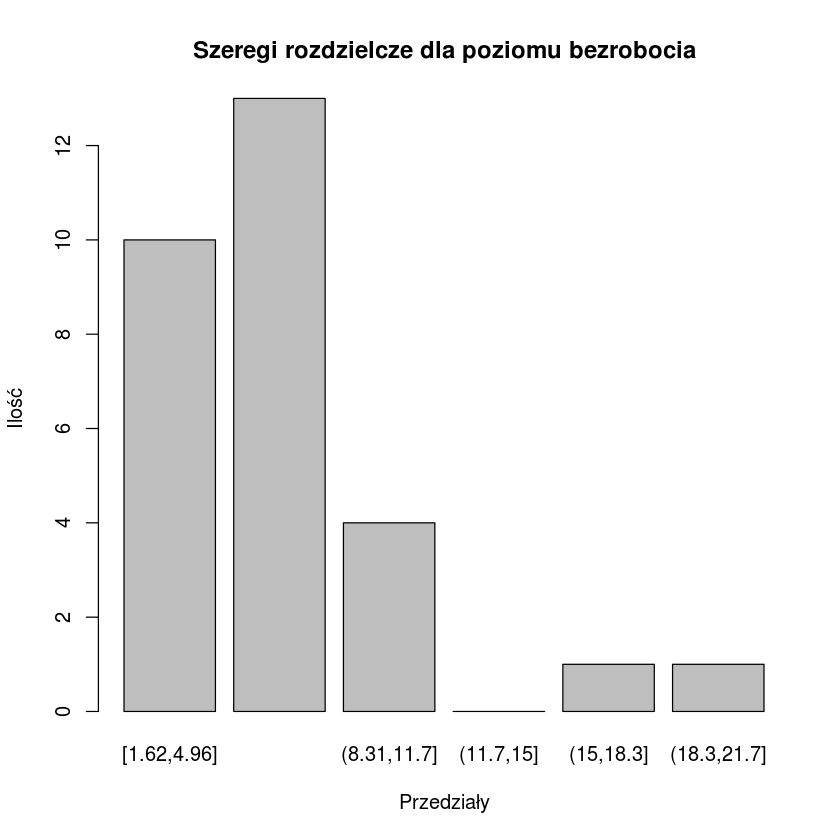

In [123]:
interval <- (max(unemployPres$unemp)-min(unemployPres$unemp))/sqrt(length(unemployPres[,1]))
borders <- c(seq(min(unemployPres$unemp)-interval/2, max(unemployPres$unemp)+interval/2, interval))
ranks <- cut(unemployPres$unemp, breaks=c(borders), include.lowest=TRUE)
barplot(table(ranks), main="Szeregi rozdzielcze dla poziomu bezrobocia", xlab = "Przedziały", ylab = "Ilość")

Możemy zaobserwować największe nagromadzenie danych na poziomie między (4.96:8.31> i zerowo na poziomie (11.7,15). Do tego występują nieliczne skrajne wartości w okolicy 20 punktów procentowych o których wspominałem wcześniej.

In [84]:
meanUnempByPotus <- aggregate(unemployPres$unemp~unemployPres$potus,unemployPres, mean)
summary(meanUnempByPotus)
meanUnempByPotus

                  unemployPres$potus unemployPres$unemp
 Barack Obama              : 1       Min.   : 3.795    
 Bill Clinton              : 1       1st Qu.: 5.054    
 Calvin Coolidge           : 1       Median : 5.600    
 Dwight David Eisenhower   : 1       Mean   : 6.747    
 Franklin Delano Roosevelt : 1       3rd Qu.: 7.800    
 George Herbert Walker Bush: 1       Max.   :14.600    
 (Other)                   :12                         

unemployPres$potus,unemployPres$unemp
Barack Obama,9.700
Bill Clinton,5.300
Calvin Coolidge,5.475
Dwight David Eisenhower,6.150
Franklin Delano Roosevelt,14.600
George Herbert Walker Bush,5.600
George Walker Bush,5.200
Gerald Rudolph Ford,5.600
Harry S. Truman,4.600
Herbert Clark Hoover,8.940


Z tych danych możemy odczytać, że największe średnie bezrobocie panowało za rządów Franklin Delano Roosevelta a najmniejsze Theodore Roosevelta.	

Założmy, że średnie bezrobocie za panowania demokratów i republikan było różne.
Za H0 = u1 == u2
Gdzie u1 to średnie bezrobocie za panowania demkoratów, a u2 republikan. Za poziom istotności przyjmę 5%.

In [18]:
republicanData <- subset(unemployPres, unemployPres$party == "Republican")
democratyData <- subset(unemployPres, unemployPres$party != "Republican")
t.test(democratyData$unemp, republicanData$unemp, alternative = c("two.sided"), conf.level = 0.95)


	Welch Two Sample t-test

data:  democratyData$unemp and republicanData$unemp
t = 0.79838, df = 15.04, p-value = 0.4371
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -2.193736  4.822390
sample estimates:
mean of x mean of y 
 7.593077  6.278750 


Na podstawie przedziału ufności i obliczonej wartości t, widzę że nie mogę odrzucić H0 i mogę przyjąć, że poziom bezrobocia nie zależy od strony do której należał prezydent.